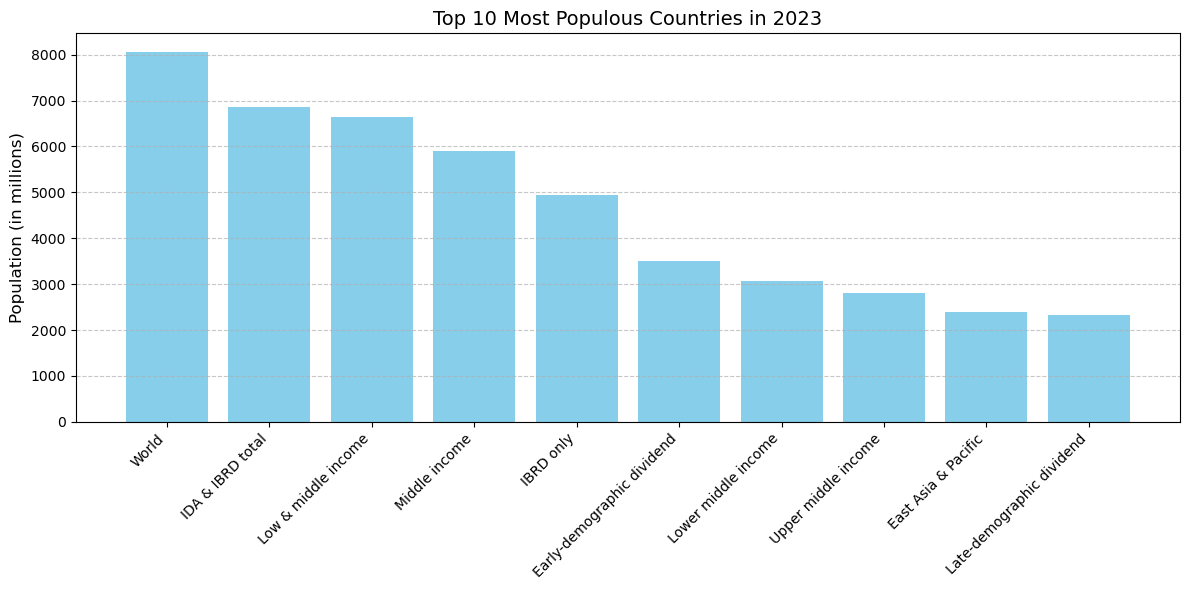

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_127006.csv"
df = pd.read_csv(file_path, skiprows=4)  # Skips metadata rows at the top

pop_2023 = df[['Country Name', '2023']].dropna()

top10_pop = pop_2023.sort_values(by='2023', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10_pop['Country Name'], top10_pop['2023'] / 1e6, color='skyblue')

plt.title('Top 10 Most Populous Countries in 2023', fontsize=14)
plt.ylabel('Population (in millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


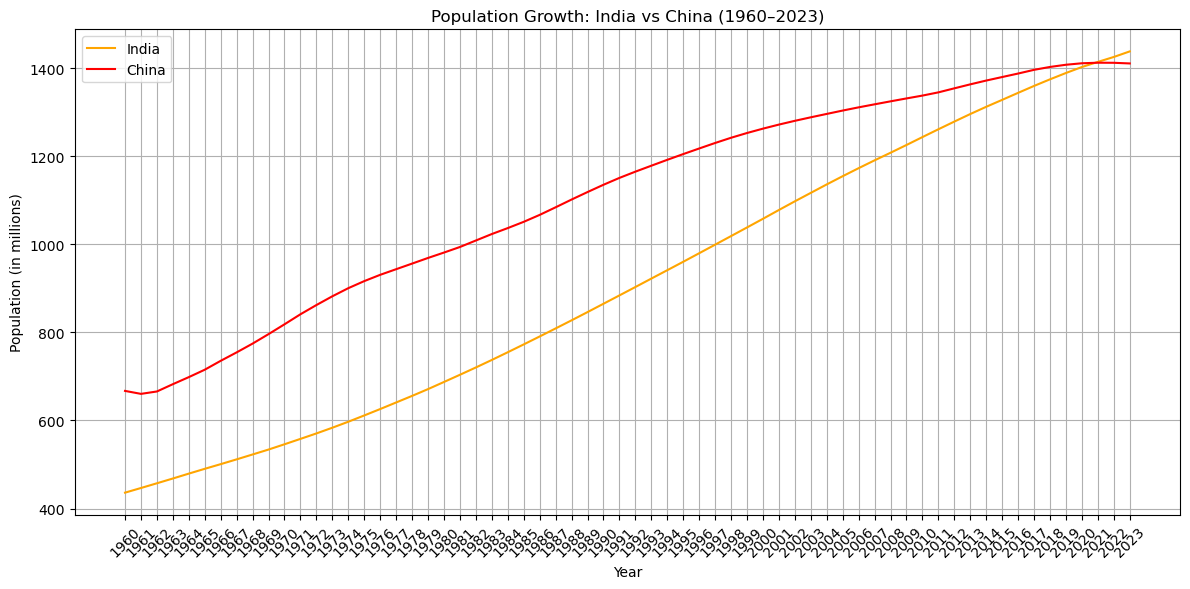

In [2]:
years = [str(year) for year in range(1960, 2024)]
india_pop = df[df['Country Name'] == 'India'][years].T
china_pop = df[df['Country Name'] == 'China'][years].T

india_pop.columns = ['India']
china_pop.columns = ['China']

combined = pd.concat([india_pop, china_pop], axis=1).astype(float)

plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['India'] / 1e6, label='India', color='orange')
plt.plot(combined.index, combined['China'] / 1e6, label='China', color='red')
plt.title('Population Growth: India vs China (1960–2023)')
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


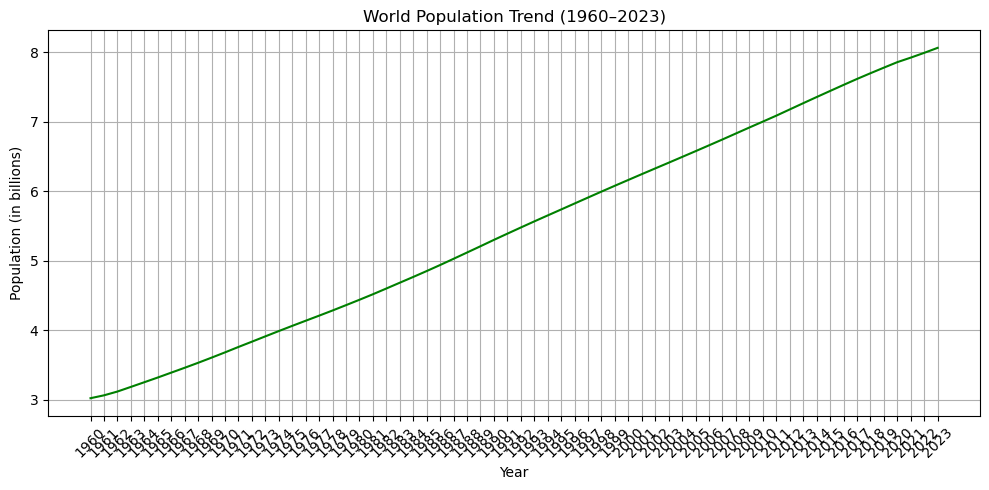

In [3]:
world_pop = df[df['Country Name'] == 'World'][years].T
world_pop.columns = ['World Population']
world_pop = world_pop.astype(float)

plt.figure(figsize=(10, 5))
plt.plot(world_pop.index, world_pop['World Population'] / 1e9, color='green')
plt.title('World Population Trend (1960–2023)')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


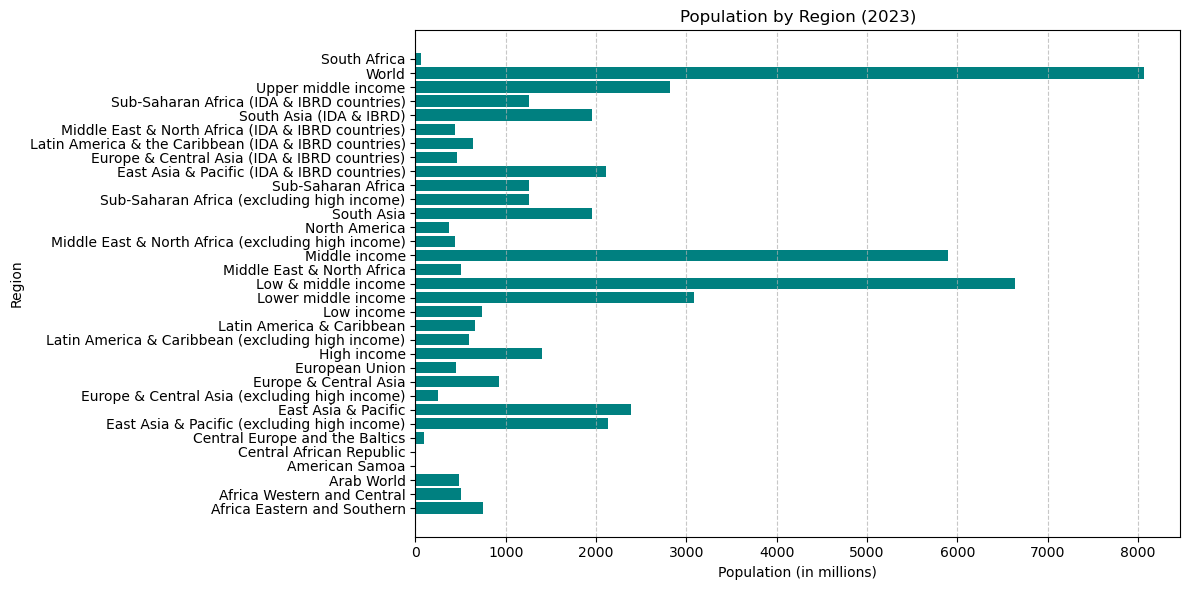

In [4]:
regions = df[df['Country Name'].str.contains('Africa|Asia|Europe|America|World|income', case=False)]
regions_2023 = regions[['Country Name', '2023']].dropna()


plt.figure(figsize=(12, 6))
plt.barh(regions_2023['Country Name'], regions_2023['2023'] / 1e6, color='teal')
plt.title('Population by Region (2023)')
plt.xlabel('Population (in millions)')
plt.ylabel('Region')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


/var/folders/k_/2_v03dyd4xz6rfmzl8p9c0_r0000gn/T/ipykernel_93008/3534639329.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Growth (%)', y='Country Name', data=top_growth, palette='coolwarm')


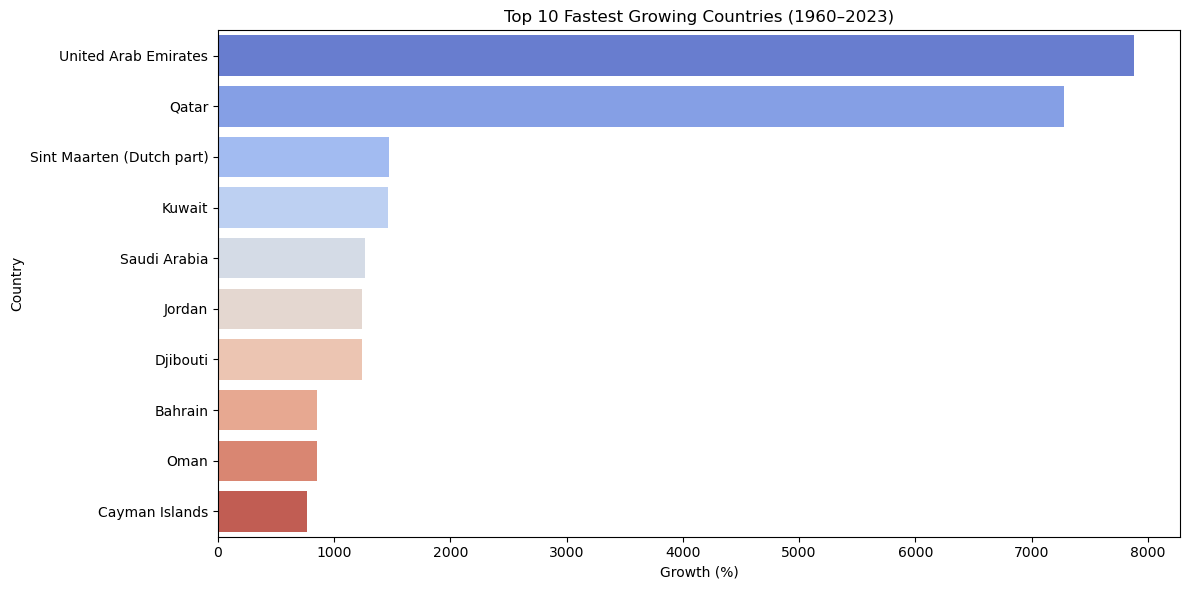

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df_growth = df[['Country Name', '1960', '2023']].dropna()
df_growth['Growth (%)'] = ((df_growth['2023'] - df_growth['1960']) / df_growth['1960']) * 100

top_growth = df_growth.sort_values(by='Growth (%)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Growth (%)', y='Country Name', data=top_growth, palette='coolwarm')
plt.title('Top 10 Fastest Growing Countries (1960–2023)')
plt.xlabel('Growth (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
